# Hyperparameter Tunning

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions

In [2]:
from typing import List, Literal

In [23]:
data = pd.read_csv(r"C:\\Users\\Archit\\Documents\\GitHub\\ML-Journey\\Datasets\\iris.csv")
data = data[['PetalLengthCm','PetalWidthCm','Species']]

In [24]:
data = data[data['Species'] != 'Iris-setosa']

In [25]:

encoder = LabelEncoder()
data['Species'] = encoder.fit_transform(data['Species'])

### Data visualization

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

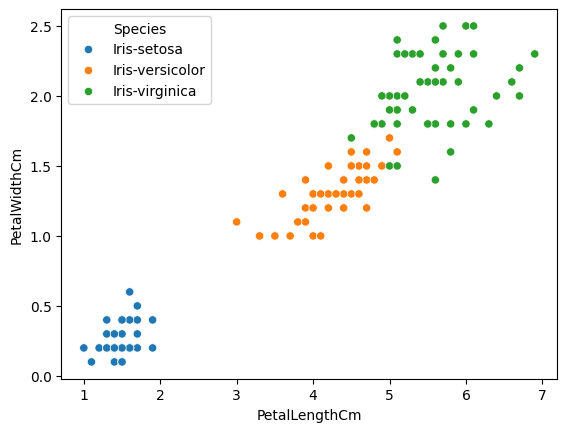

In [5]:
sns.scatterplot(data, x='PetalLengthCm', y='PetalWidthCm', hue='Species')

In [94]:
def lg(penalty='l2', dual=False, C=1, multi_class='auto', max_lter=100, solver='saga') -> None:
    """
    Plot a graph of Decision Line Create by Logistic Regression Algorithm
    also Print the accuracy score
    """
    
    X = data.iloc[:,:2]
    y = data.iloc[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression(penalty=penalty, dual=dual, C=C, multi_class=multi_class, max_iter=max_lter, solver=solver)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    plot_decision_regions(np.array(X_train), np.array(y_train), clf=model, markers='o')
    plt.xlabel(f"Acccuracy = {round(accuracy, 2)*100}%")


c:\Users\Archit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Archit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


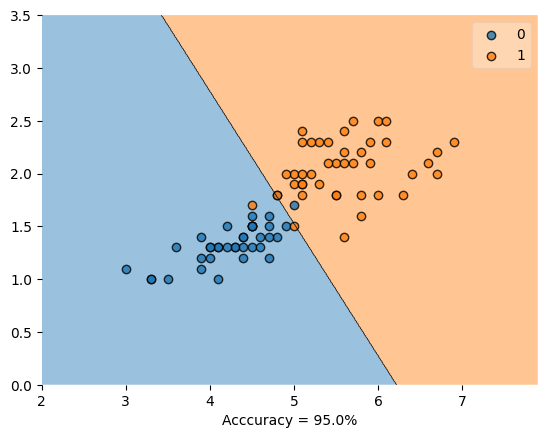

In [99]:

lg(penalty='l2', max_lter=1000, solver='newton-cg') # {'saga', 'newton-cg', 'sag', 'lbfgs', 'newton-cholesky', 'liblinear'}